In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 5*x[0]**2 + x[1]**2 + 2*x[2]**2 + 4*x[0]*x[1] - 14*x[0] - 6*x[1] + 20

def grad_f(x):
    dfdx1 = 10*x[0] + 4*x[1] - 14
    dfdx2 = 2*x[1] + 4*x[0] - 6
    dfdx3 = 4*x[2]
    return np.array([dfdx1, dfdx2, dfdx3])

def hessian_f(x):
    return np.array([
        [10, 4, 0],
        [4, 2, 0],
        [0, 0, 4]
    ])

In [3]:
def bisection_step_size(x, gradient):
    direction = -gradient
    alpha_lower = 0
    alpha_upper = 1
    epsilon = 1e-6
    while alpha_upper - alpha_lower > epsilon:
        alpha = (alpha_lower + alpha_upper) / 2
        h_prime_alpha = np.dot(grad_f(x + alpha * direction), direction)
        if h_prime_alpha < 0:
            alpha_lower = alpha
        else:
            alpha_upper = alpha
    return (alpha_lower + alpha_upper) / 2

In [4]:
def steepest_descent_bisection(x, tol=1e-6, max_iter=100):
    costs = [f(x)]
    x_history = [x]

    for i in range(max_iter):
        grad = grad_f(x)
        
        lr = bisection_step_size(x, grad)

        x_new = x - lr * grad
        costs.append(f(x_new))
        x_history.append(x_new)

        x = x_new
        
        if np.linalg.norm(grad) < tol:
            break
        
    return x, costs, x_history


def newtons_method(x0, tol=1e-6, max_iter=100):
    x = x0
    lr = 0.1
    costs = [f(x)]
    x_history = [x]
    
    for _ in range(max_iter):
        gradient = grad_f(x)
        H = hessian_f(x)

        x = x - lr * np.linalg.inv(H) @ gradient
        costs.append(f(x))
        x_history.append(x)
        
        if np.linalg.norm(gradient) < tol:
            break
            
    return x, costs, x_history

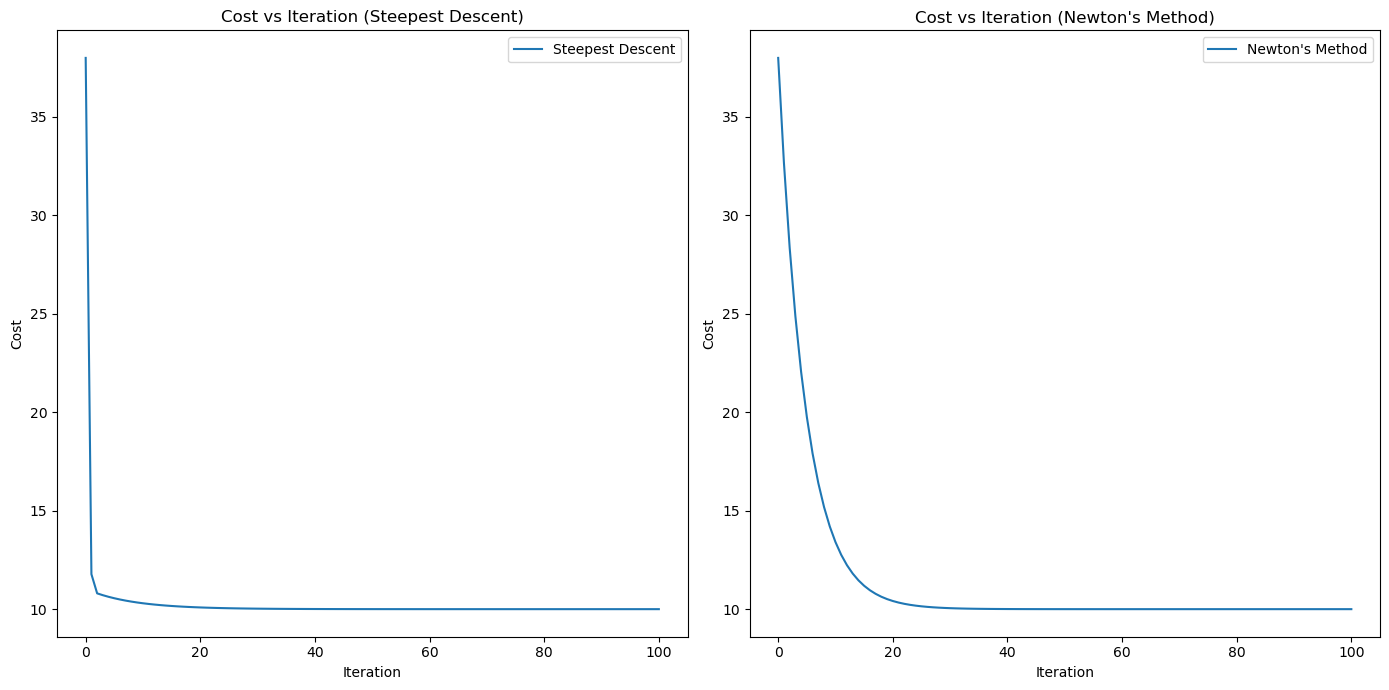

In [5]:
x0 = np.array([2, 4, 1])

sd_result, sd_costs, sd_x_history = steepest_descent_bisection(x0)
nr_result, nr_costs, nr_x_history = newtons_method(x0)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(sd_costs, label='Steepest Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration (Steepest Descent)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(nr_costs, label="Newton's Method")
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title("Cost vs Iteration (Newton's Method)")
plt.legend()

plt.tight_layout()
plt.savefig("Images/cost_vs_iteration_part_a_1.pdf")
plt.show()

In [6]:
print("Steepest Descent Result: ", sd_result)
print("Newton's Method Result: ", nr_result)

Steepest Descent Result:  [ 9.98247933e-01  1.00471213e+00 -1.51367559e-58]
Newton's Method Result:  [1.00002656e+00 1.00007968e+00 2.65613989e-05]


In [7]:
df_sd = pd.DataFrame(sd_x_history, columns=['x1', 'x2', 'x3'])
df_sd['f(x1, x2, x3)'] = sd_costs

display(df_sd)

,x1,x2,x3,"f(x1, x2, x3)"
0,2.000000,4.000000,1.000000e+00,38.000000
1,0.076928,3.125876,6.503506e-01,11.776224
2,0.263060,2.982680,-1.548448e-02,10.802437
3,0.185535,2.842138,-6.930135e-03,10.708907
4,0.348310,2.752703,-1.116183e-03,10.626594
...,...,...,...,...
96,0.997758,1.006030,-2.925085e-56,10.000007
97,0.997523,1.005603,-1.307392e-56,10.000007
98,0.998018,1.005331,-2.104218e-57,10.000006
99,0.997810,1.004953,-9.404984e-58,10.000005


In [8]:
df_nr = pd.DataFrame(nr_x_history, columns=['x1', 'x2', 'x3'])
df_nr['f(x1, x2, x3)'] = nr_costs

display(df_nr)

,x1,x2,x3,"f(x1, x2, x3)"
0,2.000000,4.000000,1.000000,38.000000
1,1.900000,3.700000,0.900000,32.680000
2,1.810000,3.430000,0.810000,28.370800
3,1.729000,3.187000,0.729000,24.880348
4,1.656100,2.968300,0.656100,22.053082
...,...,...,...,...
96,1.000040,1.000121,0.000040,10.000000
97,1.000036,1.000109,0.000036,10.000000
98,1.000033,1.000098,0.000033,10.000000
99,1.000030,1.000089,0.000030,10.000000
